In [1]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
data = pd.read_csv(uri)

data.head()


,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
swap_yesno = {
    'no': 0,
    'yes': 1
}
data.sold = data.sold.map(swap_yesno)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [3]:
# creating a new column for car age (easier to work with absolute age)

from datetime import datetime

current_year = datetime.today().year
data['car_age'] = current_year - data.model_year
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,car_age
0,0,21801,2000,30941.02,1,19
1,1,7843,1998,40557.96,1,21
2,2,7109,2006,89627.50,0,13
3,3,26823,2015,95276.14,0,4
4,4,7935,2014,117384.68,1,5


In [4]:
3# converting miles for KM

data['km_per_year'] = data.mileage_per_year*1.60934
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,car_age,km_per_year
0,0,21801,2000,30941.02,1,19,35085.22134
1,1,7843,1998,40557.96,1,21,12622.05362
2,2,7109,2006,89627.50,0,13,11440.79806
3,3,26823,2015,95276.14,0,4,43167.32682
4,4,7935,2014,117384.68,1,5,12770.11290


In [5]:
# removing unnecessary columns from data

data = data.drop(columns = ['Unnamed: 0', 'mileage_per_year', 'model_year'], axis=1)
data.head()

,price,sold,car_age,km_per_year
0,30941.02,1,19,35085.22134
1,40557.96,1,21,12622.05362
2,89627.50,0,13,11440.79806
3,95276.14,0,4,43167.32682
4,117384.68,1,5,12770.11290


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x = data[['price','car_age', 'km_per_year']]
y = data['sold']

SEED = 5
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Trained with %d elements and tested with %d elements" % (len(train_x), len(test_x)))

predict_model = SVC()                                           # creating the predict model - a non-linear and more free
predict_model.fit(train_x, train_y)                             # training the predict model
model_predictions = predict_model.predict(test_x)               # checking predictions with the desired results

model_accuracy = accuracy_score(test_y, model_predictions) * 100
print("The model accuracy is %.2f%%" % model_accuracy)

Trained with 7500 elements and tested with 2500 elements


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The model accuracy is 58.00%


In [7]:
from sklearn.dummy import DummyClassifier

dummy_stratified =  DummyClassifier()                                      # Creating a baseline (using Dummy function)
dummy_stratified.fit(train_x, train_y)                                     # training the dummy predict model
dummy_accuracy = dummy_stratified.score(test_x, test_y) * 100              # checking dummy predictions with the desired results

print("The dummy stratified accuracy is %.2f%%" % dummy_accuracy)

The dummy stratified accuracy is 52.44%


In [8]:
dummy_mostfrequent =  DummyClassifier()                                      # Creating a baseline (using Dummy function)
dummy_mostfrequent.fit(train_x, train_y)                                     # training the dummy predict model
dummy_accuracy = dummy_mostfrequent.score(test_x, test_y) * 100                # checking dummy predictions with the desired results

print("The dummy most frequent accuracy is %.2f%%" % dummy_accuracy)

The dummy most frequent accuracy is 50.68%


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Trained with %d elements and tested with %d elements" % (len(train_x), len(test_x)))

scaler = StandardScaler()                                       # Rescaling axis
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

predict_model = SVC()                                           # creating the predict model - a non-linear and more free
predict_model.fit(train_x, train_y)                             # training the predict model
model_predictions = predict_model.predict(test_x)               # checking predictions with the desired results

model_accuracy = accuracy_score(test_y, model_predictions) * 100
print("The model accuracy is %.2f%%" % model_accuracy)

Trained with 7500 elements and tested with 2500 elements
The model accuracy is 77.48%


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Trained with %d elements and tested with %d elements" % (len(train_x), len(test_x)))

predict_model = DecisionTreeClassifier(max_depth=3)                     # creating the decision tree
predict_model.fit(raw_train_x, train_y)                                 # training the decision tree
model_predictions = predict_model.predict(raw_test_x)                   # checking predictions with the desired results

model_accuracy = accuracy_score(test_y, model_predictions) * 100
print("The model accuracy is %.2f%%" % model_accuracy)

Trained with 7500 elements and tested with 2500 elements
The model accuracy is 79.28%


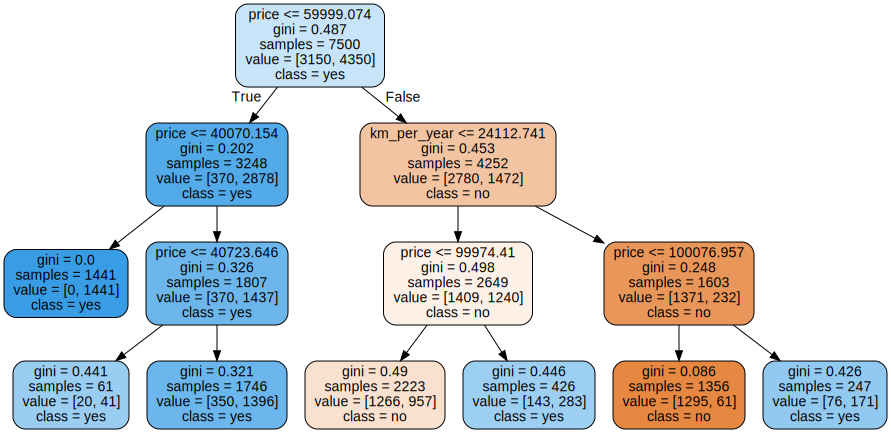

In [18]:
# Plotting the Decision Tree

from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(predict_model, out_file = None, filled = True, rounded = True, feature_names = features, class_names = [ 'no', 'yes'])
data_chart = graphviz.Source(dot_data)
data_chart